In [366]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [367]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [452]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [369]:
dataset = pd.read_csv('Salary Data.csv')
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [370]:
dataset.shape

(375, 6)

In [371]:
dataset.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [372]:
dataset.dropna(axis = 0, inplace=True)

In [373]:
dataset.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [374]:
dataset.shape

(373, 6)

In [384]:
dataset_new = dataset.duplicated()

In [386]:
dataset_new = dataset.drop_duplicates()

In [388]:
dataset_new.duplicated().sum()

0

In [390]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset_new['Gender'] = label_encoder.fit_transform(dataset_new['Gender'])
dataset_new['Education Level'] = label_encoder.fit_transform(dataset_new['Education Level'])
dataset_new['Job Title'] = label_encoder.fit_transform(dataset_new['Job Title'])
dataset_new

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_3267/2278168850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Gender'] = label_encoder.fit_transform(dataset_new['Gender'])
/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_3267/2278168850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Education Level'] = label_encoder.fit_transform(dataset_new['Education Level'])
/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_3267/2278168850.py:5: SettingWi

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


In [394]:
dataset_new.shape

(324, 6)

In [396]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_new[['Age']] = scaler.fit_transform(dataset_new[['Age']]) 
dataset_new[['Years of Experience']] = scaler.fit_transform(dataset_new[['Years of Experience']])

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_3267/1021240192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new[['Age']] = scaler.fit_transform(dataset_new[['Age']])
/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_3267/1021240192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new[['Years of Experience']] = scaler.fit_transform(dataset_new[['Years of Experience']])


In [400]:
dataset_new

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.750231,1,0,159,-0.761821,90000.0
1,-1.307742,0,1,17,-1.063017,65000.0
2,1.061680,1,2,130,0.744158,150000.0
3,-0.192720,0,0,101,-0.460625,60000.0
4,2.037324,1,1,22,1.497148,200000.0
...,...,...,...,...,...,...
348,-1.307742,0,0,68,-1.364212,35000.0
349,-0.192720,1,0,111,-0.310027,110000.0
350,0.922302,0,2,115,0.894756,160000.0
351,-0.889609,1,0,63,-1.063017,55000.0


In [402]:
X = dataset_new.iloc[:,:-1].values
y = dataset_new.iloc[:, -1].values

In [404]:
X.shape

(324, 5)

In [406]:
X

array([[ -0.75023085,   1.        ,   0.        , 159.        ,
         -0.76182086],
       [ -1.30774185,   0.        ,   1.        ,  17.        ,
         -1.06301666],
       [  1.06167989,   1.        ,   2.        , 130.        ,
          0.74415815],
       ...,
       [  0.92230215,   0.        ,   2.        , 115.        ,
          0.89475605],
       [ -0.8896086 ,   1.        ,   0.        ,  63.        ,
         -1.06301666],
       [  0.7829244 ,   1.        ,   1.        ,  30.        ,
          1.34654975]])

In [408]:
y.shape

(324,)

In [410]:
y

array([ 90000.,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000.,  75000., 140000.,  65000., 130000.,
        40000., 125000.,  90000., 115000.,  35000., 180000.,  80000.,
       190000.,  50000.,  60000., 140000.,  45000., 110000.,  40000.,
       140000.,  90000., 250000.,  55000.,  75000.,  65000., 170000.,
        45000.,  60000., 115000.,  40000., 160000.,  80000., 190000.,
        60000.,  45000., 130000.,  40000.,  75000., 180000., 120000.,
        35000., 130000.,  85000.,  60000., 200000.,  50000.,  95000.,
        65000., 140000.,  55000., 105000., 170000.,  50000.,  80000.,
       180000.,  35000.,  90000., 120000.,  45000.,  90000., 150000.,
        65000.,  70000., 190000.,  40000., 120000.,  95000., 160000.,
       100000., 180000.,  55000.,  70000.,  80000.,  30000., 250000.,
        40000.,  95000.,  45000.,  80000., 135000.,  55000., 120000.,
        40000., 105000., 170000.,  75000.,  65000., 160000.,  35000.,
        90000., 1100

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [414]:
regressor_model = LinearRegression()
regressor_model.fit(X_train, y_train)

LinearRegression()

In [444]:
y_pred = regressor_model.predict(X_test)

In [446]:
y_pred

array([ 64456.9650636 , 104183.71875354, 134326.10929955,  64457.47117144,
        47341.74153202,  41871.73578323,  98820.5140752 ,  84558.12363487,
       185584.16138877,  47343.02980653, 125418.37892057, 149844.27634161,
        38785.57907506,  49622.28624728, 187859.59901579,  38784.24479074,
       104542.23415596,  90028.95756013, 137768.89500818, 124742.92424865,
       128154.62405967, 149055.82743758, 174507.64321725,  45798.91623186,
       121650.46419733, 173588.89400749,  41064.789506  , 155666.58616928,
        61723.98662058, 121301.84090277, 168333.12133031,  90484.05985652,
        52811.70127101, 167877.19085745, 165604.60583828,  39520.12381368,
        90835.53575893,  78835.66739725,  61266.49181439, 111285.22560515,
        70280.28710696, 108199.02288717,  44151.91242006, 179874.16060147,
       162868.22266976,  70280.10306774, 115834.45771281,  61370.44027699,
       168229.40291672, 121655.43325616,  87748.59688408,  43799.60834118,
        95733.25313173,  

In [448]:
y_test

array([ 65000.,  90000., 125000.,  65000.,  40000.,  35000.,  95000.,
       100000., 180000.,  40000., 130000., 145000.,  35000.,  45000.,
       180000.,  35000., 110000., 110000., 105000., 100000., 130000.,
       120000., 175000.,  35000.,  80000., 150000.,  40000., 160000.,
        80000., 120000., 170000.,  90000.,  50000., 180000., 190000.,
        35000.,  95000.,  65000.,  50000.,  65000.,  50000., 110000.,
        45000., 170000., 140000.,  50000., 100000.,  45000., 180000.,
       120000.,  95000.,  40000., 105000.,  90000.,  60000.,  55000.,
       140000.,  65000., 120000.,  50000., 115000.,  65000., 120000.,
        45000., 150000.])

In [454]:
res = mean_squared_error(y_pred, y_test)

In [456]:
res

255755140.61102176

In [462]:
res2 = r2_score(y_pred, y_test)
res2

0.876722856885638

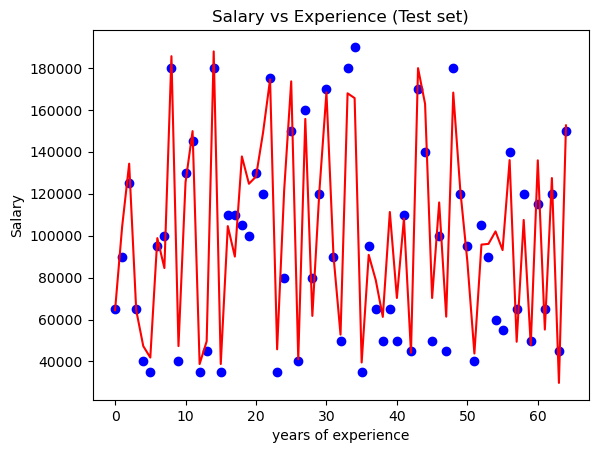

In [482]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

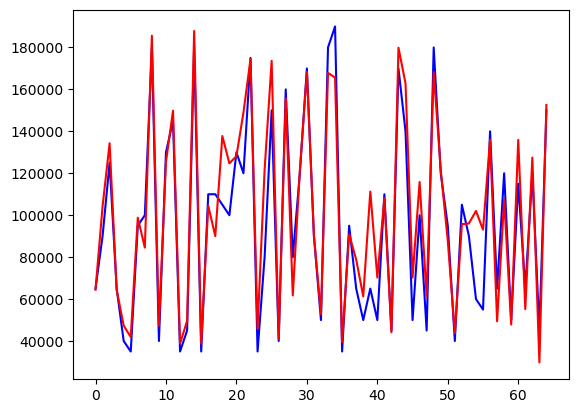

In [476]:
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_pred)), y_pred, color='red')

plt.show()